### РОССИЙСКИЙ УНИВЕРСИТЕТ ДРУЖБЫ НАРОДОВ

#### Факультет физико-математических и естественных наук  
#### Кафедра математического моделирования и искусственного интеллекта 

## ОТЧЕТ ПО ЛАБОРАТОРНОЙ РАБОТЕ № 6

#### Дисциплина: Интеллектуальный анализ данных

##### Студент:  Генералов Даниил
##### Группа:   НПИбд-01-21

## Москва 2024
***

1.    Считайте заданный набор данных из репозитария UCI, включая указанный в индивидуальном задании столбец с метками классов.. 

 

2.    Если среди меток класса имеются пропущенные значения, то удалите записи с пропущенными метками класса. Преобразуйте категориальные признаки в числовые при помощи кодирования меток (label encoding). Если в признаках имеются пропущенные значения, то замените пропущенные значения, используя метод, указанный в индивидуальном задании. Если в признаках пропущенных значений нет, то удалите из набора данных записи, идентифицированные как выбросы при помощи метода кластеризации DBSCAN. 

 

3.    Используя метод снижения размерности данных, указанный в индивидуальном задании, определите и оставьте в наборе данных не более четырех признаков. 

 

4.    Нормализуйте оставшиеся признаки набора данных методом, указанным в индивидуальном задании. 

 

5.    Визуализируйте набор данных в виде точек в трехмерном пространстве, отображая точки разных классов разными цветами. При визуализации набора данных используйте три признака с наиболее высокой оценкой важности. В качестве подписей осей используйте названия признаков. В подписи рисунка укажите название набора данных. Создайте легенду набора данных. 

 

6.    Разбейте набор данных на обучающую и тестовую выборки. Создайте и обучите классификатор на основе деревьев решений с глубиной дерева не более 4, определите долю верных ответов на тестовой выборке и визуализируйте границу принятия решений и построенное дерево решений. При визуализации границы принятия решений используйте два признака с наиболее высокой оценкой важности. 

 

7.    Постройте и обучите дополнительные базовые классификаторы, указанные в индивидуальном задании, затем постройте из классификатора дерева решений и дополнительных классификаторов комбинированный классификатор, указанный в индивидуальном задании. Оцените производительность базовых классификаторов и комбинированного классификатора по показателю, указанному в индивидуальном задании. 

 

8.    Постройте и обучите пару ансамблевых классификаторов, указанных в индивидуальном задании, и сравните их производительность по показателю, указанному в индивидуальном задании. 

 

9.    Постройте границы принятия решений ансамблевых классификаторов с визуализацией точек набора данных разных классов разными цветами. Подпишите оси и рисунок. 



# Вариант 10 

Automobile Data Set 

Название файла: imports-85.data 

Ссылка: http://archive.ics.uci.edu/ml/datasets/Automobile 

Класс: num-of-doors (столбец No 6) 

Метод обработки пропущенных значений – медиана признака 

Метод нормализации признаков – нормировка по норме max 

Алгоритм снижения размерности данных – рекурсивное исключение признаков (RFE) 

Дополнительные базовые классификаторы: 

⁃               наивный байесовский классификатор 

⁃               классификатор ближайших соседей (к-во соседей = 3) 

Комбинированный классификатор: VotingClassifier 

Ансамблевые классификаторы: BaggingClassifier, GradientBoostingClassifier 

Показатель качества модели – коэффициент Жаккара (jaccard) 

 

# 1. открыть базу данных и прочитать значения

In [1]:
from ucimlrepo import fetch_ucirepo 

# fetch dataset 
automobile= fetch_ucirepo(id=10)

In [2]:
automobile['data'].keys()

dict_keys(['ids', 'features', 'targets', 'original', 'headers'])

In [3]:
automobile['data']['features']

,price,highway-mpg,city-mpg,peak-rpm,horsepower,compression-ratio,stroke,bore,fuel-system,engine-size,...,length,wheel-base,engine-location,drive-wheels,body-style,num-of-doors,aspiration,fuel-type,make,normalized-losses
0,13495.0,27,21,5000.0,111.0,9.0,2.68,3.47,mpfi,130,...,168.8,88.6,front,rwd,convertible,2.0,std,gas,alfa-romero,NaN
1,16500.0,27,21,5000.0,111.0,9.0,2.68,3.47,mpfi,130,...,168.8,88.6,front,rwd,convertible,2.0,std,gas,alfa-romero,NaN
2,16500.0,26,19,5000.0,154.0,9.0,3.47,2.68,mpfi,152,...,171.2,94.5,front,rwd,hatchback,2.0,std,gas,alfa-romero,NaN
3,13950.0,30,24,5500.0,102.0,10.0,3.40,3.19,mpfi,109,...,176.6,99.8,front,fwd,sedan,4.0,std,gas,audi,164.0
4,17450.0,22,18,5500.0,115.0,8.0,3.40,3.19,mpfi,136,...,176.6,99.4,front,4wd,sedan,4.0,std,gas,audi,164.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,16845.0,28,23,5400.0,114.0,9.5,3.15,3.78,mpfi,141,...,188.8,109.1,front,rwd,sedan,4.0,std,gas,volvo,95.0
201,19045.0,25,19,5300.0,160.0,8.7,3.15,3.78,mpfi,141,...,188.8,109.1,front,rwd,sedan,4.0,turbo,gas,volvo,95.0
202,21485.0,23,18,5500.0,134.0,8.8,2.87,3.58,mpfi,173,...,188.8,109.1,front,rwd,sedan,4.0,std,gas,volvo,95.0
203,22470.0,27,26,4800.0,106.0,23.0,3.40,3.01,idi,145,...,188.8,109.1,front,rwd,sedan,4.0,turbo,diesel,volvo,95.0


In [4]:
automobile['data']['features']['num-of-doors'].unique()

array([ 2.,  4., nan])

In [5]:
data = automobile['data']['features']

# 2. предобработка данных

In [6]:
KLASS = 'num-of-doors'

data = data.dropna(subset=[KLASS])
data

,price,highway-mpg,city-mpg,peak-rpm,horsepower,compression-ratio,stroke,bore,fuel-system,engine-size,...,length,wheel-base,engine-location,drive-wheels,body-style,num-of-doors,aspiration,fuel-type,make,normalized-losses
0,13495.0,27,21,5000.0,111.0,9.0,2.68,3.47,mpfi,130,...,168.8,88.6,front,rwd,convertible,2.0,std,gas,alfa-romero,NaN
1,16500.0,27,21,5000.0,111.0,9.0,2.68,3.47,mpfi,130,...,168.8,88.6,front,rwd,convertible,2.0,std,gas,alfa-romero,NaN
2,16500.0,26,19,5000.0,154.0,9.0,3.47,2.68,mpfi,152,...,171.2,94.5,front,rwd,hatchback,2.0,std,gas,alfa-romero,NaN
3,13950.0,30,24,5500.0,102.0,10.0,3.40,3.19,mpfi,109,...,176.6,99.8,front,fwd,sedan,4.0,std,gas,audi,164.0
4,17450.0,22,18,5500.0,115.0,8.0,3.40,3.19,mpfi,136,...,176.6,99.4,front,4wd,sedan,4.0,std,gas,audi,164.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,16845.0,28,23,5400.0,114.0,9.5,3.15,3.78,mpfi,141,...,188.8,109.1,front,rwd,sedan,4.0,std,gas,volvo,95.0
201,19045.0,25,19,5300.0,160.0,8.7,3.15,3.78,mpfi,141,...,188.8,109.1,front,rwd,sedan,4.0,turbo,gas,volvo,95.0
202,21485.0,23,18,5500.0,134.0,8.8,2.87,3.58,mpfi,173,...,188.8,109.1,front,rwd,sedan,4.0,std,gas,volvo,95.0
203,22470.0,27,26,4800.0,106.0,23.0,3.40,3.01,idi,145,...,188.8,109.1,front,rwd,sedan,4.0,turbo,diesel,volvo,95.0


In [7]:
from sklearn.preprocessing import LabelEncoder
KATEGORICAL = ['fuel-system', 'engine-location', 'drive-wheels', 'engine-type', 'num-of-cylinders', 'body-style', 'aspiration', 'fuel-type', 'make']
ENCODERS = []
for k in KATEGORICAL:
    encoder = LabelEncoder()
    data[k] = encoder.fit_transform(data[k])
    ENCODERS.append(encoder)

data

/tmp/ipykernel_53338/2462000071.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[k] = encoder.fit_transform(data[k])
/tmp/ipykernel_53338/2462000071.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[k] = encoder.fit_transform(data[k])
/tmp/ipykernel_53338/2462000071.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

,price,highway-mpg,city-mpg,peak-rpm,horsepower,compression-ratio,stroke,bore,fuel-system,engine-size,...,length,wheel-base,engine-location,drive-wheels,body-style,num-of-doors,aspiration,fuel-type,make,normalized-losses
0,13495.0,27,21,5000.0,111.0,9.0,2.68,3.47,5,130,...,168.8,88.6,0,2,0,2.0,0,1,0,NaN
1,16500.0,27,21,5000.0,111.0,9.0,2.68,3.47,5,130,...,168.8,88.6,0,2,0,2.0,0,1,0,NaN
2,16500.0,26,19,5000.0,154.0,9.0,3.47,2.68,5,152,...,171.2,94.5,0,2,2,2.0,0,1,0,NaN
3,13950.0,30,24,5500.0,102.0,10.0,3.40,3.19,5,109,...,176.6,99.8,0,1,3,4.0,0,1,1,164.0
4,17450.0,22,18,5500.0,115.0,8.0,3.40,3.19,5,136,...,176.6,99.4,0,0,3,4.0,0,1,1,164.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,16845.0,28,23,5400.0,114.0,9.5,3.15,3.78,5,141,...,188.8,109.1,0,2,3,4.0,0,1,21,95.0
201,19045.0,25,19,5300.0,160.0,8.7,3.15,3.78,5,141,...,188.8,109.1,0,2,3,4.0,1,1,21,95.0
202,21485.0,23,18,5500.0,134.0,8.8,2.87,3.58,5,173,...,188.8,109.1,0,2,3,4.0,0,1,21,95.0
203,22470.0,27,26,4800.0,106.0,23.0,3.40,3.01,3,145,...,188.8,109.1,0,2,3,4.0,1,0,21,95.0


In [8]:
for col in data.columns:
    data[col] = data[col].fillna(data[col].median())

data

/tmp/ipykernel_53338/3630728420.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = data[col].fillna(data[col].median())
/tmp/ipykernel_53338/3630728420.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = data[col].fillna(data[col].median())
/tmp/ipykernel_53338/3630728420.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

,price,highway-mpg,city-mpg,peak-rpm,horsepower,compression-ratio,stroke,bore,fuel-system,engine-size,...,length,wheel-base,engine-location,drive-wheels,body-style,num-of-doors,aspiration,fuel-type,make,normalized-losses
0,13495.0,27,21,5000.0,111.0,9.0,2.68,3.47,5,130,...,168.8,88.6,0,2,0,2.0,0,1,0,115.0
1,16500.0,27,21,5000.0,111.0,9.0,2.68,3.47,5,130,...,168.8,88.6,0,2,0,2.0,0,1,0,115.0
2,16500.0,26,19,5000.0,154.0,9.0,3.47,2.68,5,152,...,171.2,94.5,0,2,2,2.0,0,1,0,115.0
3,13950.0,30,24,5500.0,102.0,10.0,3.40,3.19,5,109,...,176.6,99.8,0,1,3,4.0,0,1,1,164.0
4,17450.0,22,18,5500.0,115.0,8.0,3.40,3.19,5,136,...,176.6,99.4,0,0,3,4.0,0,1,1,164.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,16845.0,28,23,5400.0,114.0,9.5,3.15,3.78,5,141,...,188.8,109.1,0,2,3,4.0,0,1,21,95.0
201,19045.0,25,19,5300.0,160.0,8.7,3.15,3.78,5,141,...,188.8,109.1,0,2,3,4.0,1,1,21,95.0
202,21485.0,23,18,5500.0,134.0,8.8,2.87,3.58,5,173,...,188.8,109.1,0,2,3,4.0,0,1,21,95.0
203,22470.0,27,26,4800.0,106.0,23.0,3.40,3.01,3,145,...,188.8,109.1,0,2,3,4.0,1,0,21,95.0


# 3. снижение размерности

In [9]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import SGDClassifier

est = SGDClassifier()
rfe = RFE(estimator=est, n_features_to_select=4)

X = data.drop(KLASS, axis=1)

rfe.fit(X, data[KLASS])

print(rfe.support_)

[False False False False  True False False False False  True False False
  True False False False False False False False False False False  True]


In [10]:
Xreduced = X[X.columns[rfe.support_]]

Xreduced

,horsepower,engine-size,curb-weight,normalized-losses
0,111.0,130,2548,115.0
1,111.0,130,2548,115.0
2,154.0,152,2823,115.0
3,102.0,109,2337,164.0
4,115.0,136,2824,164.0
...,...,...,...,...
200,114.0,141,2952,95.0
201,160.0,141,3049,95.0
202,134.0,173,3012,95.0
203,106.0,145,3217,95.0


# 4. нормализация данных

In [11]:
Xreduced = (Xreduced - Xreduced.max()) / (Xreduced.max())

Xreduced

,horsepower,engine-size,curb-weight,normalized-losses
0,-0.614583,-0.601227,-0.373340,-0.550781
1,-0.614583,-0.601227,-0.373340,-0.550781
2,-0.465278,-0.533742,-0.305706,-0.550781
3,-0.645833,-0.665644,-0.425234,-0.359375
4,-0.600694,-0.582822,-0.305460,-0.359375
...,...,...,...,...
200,-0.604167,-0.567485,-0.273979,-0.628906
201,-0.444444,-0.567485,-0.250123,-0.628906
202,-0.534722,-0.469325,-0.259223,-0.628906
203,-0.631944,-0.555215,-0.208805,-0.628906


# 5. визуализация

In [12]:
rfe_more = RFE(estimator=SGDClassifier(), n_features_to_select=3)
rfe_more.fit(Xreduced, data[KLASS])


rfe_most = RFE(estimator=SGDClassifier(), n_features_to_select=2)
rfe_most.fit(Xreduced, data[KLASS])

Xreduced_more = Xreduced[Xreduced.columns[rfe_more.support_]]
Xreduced_most = Xreduced[Xreduced.columns[rfe_most.support_]]

Xreduced_more

,horsepower,curb-weight,normalized-losses
0,-0.614583,-0.373340,-0.550781
1,-0.614583,-0.373340,-0.550781
2,-0.465278,-0.305706,-0.550781
3,-0.645833,-0.425234,-0.359375
4,-0.600694,-0.305460,-0.359375
...,...,...,...
200,-0.604167,-0.273979,-0.628906
201,-0.444444,-0.250123,-0.628906
202,-0.534722,-0.259223,-0.628906
203,-0.631944,-0.208805,-0.628906


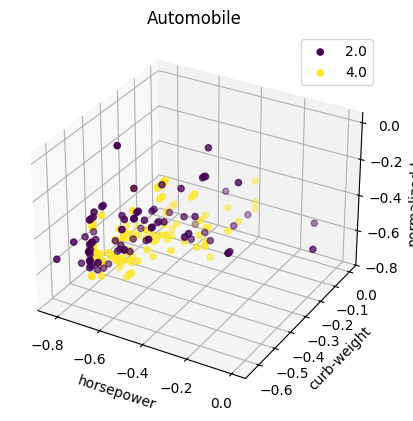

In [13]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

cols = Xreduced_more.columns

for k in set(data[KLASS]):
    Xreduced_more_subset = Xreduced_more[data[KLASS] == k]
    ax.scatter(Xreduced_more_subset[cols[0]], Xreduced_more_subset[cols[1]], Xreduced_more_subset[cols[2]], label=k, c=[k for _ in Xreduced_more_subset[cols[0]]], vmin=min(data[KLASS]), vmax=max(data[KLASS]))

ax.set_xlabel(cols[0])
ax.set_ylabel(cols[1])
ax.set_zlabel(cols[2])
ax.legend()
plt.title('Automobile')
plt.show()


# 6. классификация

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Xreduced_more, data[KLASS], test_size=0.2)

In [15]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth=4)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

In [16]:
train_ok = (clf.predict(X_train) == y_train).sum()
test_ok = (clf.predict(X_test) == y_test).sum()
print("Train OK:", train_ok, "/", len(y_train), "=", train_ok/len(y_train))
print("Test  OK:", test_ok, "/", len(y_test), "=", test_ok/len(y_test))

Train OK: 139 / 162 = 0.8580246913580247
Test  OK: 26 / 41 = 0.6341463414634146


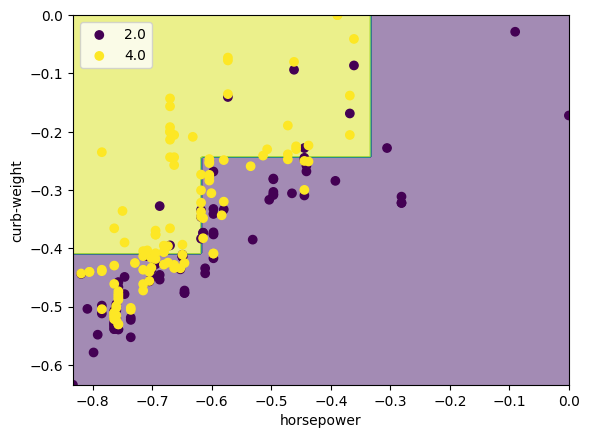

In [17]:
import pandas as pd
import numpy as np
from sklearn.inspection import DecisionBoundaryDisplay

fig = plt.figure()
ax = fig.add_subplot()

cols = Xreduced_most.columns

xx0, xx1 = np.meshgrid(np.linspace(min(Xreduced_most[cols[0]]), max(Xreduced_most[cols[0]]), 200), np.linspace(min(Xreduced_most[cols[1]]), max(Xreduced_most[cols[1]]), 200))

least_important_col = list(set(Xreduced_more.columns) - set(cols))[0]
least_important_col_avg = Xreduced_more[least_important_col].mean()

Xmeshgrid = pd.DataFrame(np.array([xx0.ravel(), xx1.ravel(), [least_important_col_avg] * len(xx0.ravel())]).T, columns=[cols[0], cols[1], least_important_col])

response = clf.predict(Xmeshgrid)
response = response.reshape(xx0.shape)

DecisionBoundaryDisplay(xx0=xx0, xx1=xx1, response=response, xlabel=cols[0], ylabel=cols[1]).plot(ax=ax, cmap='viridis', alpha=0.5)

for k in set(data[KLASS]):
    Xreduced_most_subset = Xreduced_most[data[KLASS] == k]
    ax.scatter(Xreduced_most_subset[cols[0]], Xreduced_most_subset[cols[1]], c=[k for _ in Xreduced_most_subset[cols[0]]], vmin=min(data[KLASS]), vmax=max(data[KLASS]), label=k)
ax.legend()


# 7. комбинирование классификаторов

In [18]:
from sklearn.naive_bayes import GaussianNB

clf2 = GaussianNB()
clf2.fit(X_train, y_train)

train_ok = (clf2.predict(X_train) == y_train).sum()
test_ok = (clf2.predict(X_test) == y_test).sum()
print("Train OK:", train_ok, "/", len(y_train), "=", train_ok/len(y_train))
print("Test  OK:", test_ok, "/", len(y_test), "=", test_ok/len(y_test))

Train OK: 107 / 162 = 0.6604938271604939
Test  OK: 21 / 41 = 0.5121951219512195


In [19]:
# k nearest neighbors (k=3)
from sklearn.neighbors import KNeighborsClassifier

clf3 = KNeighborsClassifier(n_neighbors=3)
clf3.fit(X_train, y_train)

train_ok = (clf3.predict(X_train) == y_train).sum()
test_ok = (clf3.predict(X_test) == y_test).sum()
print("Train OK:", train_ok, "/", len(y_train), "=", train_ok/len(y_train))
print("Test  OK:", test_ok, "/", len(y_test), "=", test_ok/len(y_test))

Train OK: 146 / 162 = 0.9012345679012346
Test  OK: 31 / 41 = 0.7560975609756098


In [20]:
from sklearn.ensemble import VotingClassifier

clf4 = VotingClassifier([
    ('decision-tree', clf),
    ('naive-bayes', clf2),
    ('knn', clf3)
])

clf4.fit(X_train, y_train)

train_ok = (clf4.predict(X_train) == y_train).sum()
test_ok = (clf4.predict(X_test) == y_test).sum()
print("Train OK:", train_ok, "/", len(y_train), "=", train_ok/len(y_train))
print("Test  OK:", test_ok, "/", len(y_test), "=", test_ok/len(y_test))

Train OK: 141 / 162 = 0.8703703703703703
Test  OK: 26 / 41 = 0.6341463414634146


In [21]:
from sklearn.metrics import jaccard_score

print("jaccard_score:")
print("Decision tree:", jaccard_score(y_test, clf.predict(X_test), average='weighted'))
print("Naive Bayes  :", jaccard_score(y_test, clf2.predict(X_test), average='weighted'))
print("KNN          :", jaccard_score(y_test, clf3.predict(X_test), average='weighted'))
print("Voting       :", jaccard_score(y_test, clf4.predict(X_test), average='weighted'))


jaccard_score:
Decision tree: 0.46593776282590416
Naive Bayes  : 0.3448110951697752
KNN          : 0.6086303939962476
Voting       : 0.4662288930581613


# 8. ансамблевый классификатор

In [22]:
from sklearn.ensemble import BaggingClassifier

clf5 = BaggingClassifier(n_estimators=1000)
clf5.fit(X_train, y_train)

train_ok = (clf5.predict(X_train) == y_train).sum()
test_ok = (clf5.predict(X_test) == y_test).sum()
print("Train OK:", train_ok, "/", len(y_train), "=", train_ok/len(y_train))
print("Test  OK:", test_ok, "/", len(y_test), "=", test_ok/len(y_test))

Train OK: 162 / 162 = 1.0
Test  OK: 33 / 41 = 0.8048780487804879


In [23]:
# gradient boosting
from sklearn.ensemble import GradientBoostingClassifier

clf6 = GradientBoostingClassifier(n_estimators=1000)
clf6.fit(X_train, y_train)

train_ok = (clf6.predict(X_train) == y_train).sum()
test_ok = (clf6.predict(X_test) == y_test).sum()
print("Train OK:", train_ok, "/", len(y_train), "=", train_ok/len(y_train))
print("Test  OK:", test_ok, "/", len(y_test), "=", test_ok/len(y_test))

Train OK: 162 / 162 = 1.0
Test  OK: 29 / 41 = 0.7073170731707317


In [24]:
print("jaccard_score:")
print("Decision tree:", jaccard_score(y_test, clf.predict(X_test), average='weighted'))
print("Naive Bayes  :", jaccard_score(y_test, clf2.predict(X_test), average='weighted'))
print("KNN          :", jaccard_score(y_test, clf3.predict(X_test), average='weighted'))
print("Voting       :", jaccard_score(y_test, clf4.predict(X_test), average='weighted'))
print("Bagging      :", jaccard_score(y_test, clf5.predict(X_test), average='weighted'))
print("Gradient     :", jaccard_score(y_test, clf6.predict(X_test), average='weighted'))

jaccard_score:
Decision tree: 0.46593776282590416
Naive Bayes  : 0.3448110951697752
KNN          : 0.6086303939962476
Voting       : 0.4662288930581613
Bagging      : 0.6741463414634147
Gradient     : 0.5488501742160279


# 9. границы ансамблевых классификаторов

Text(0.5, 1.0, 'BaggingClassifier')

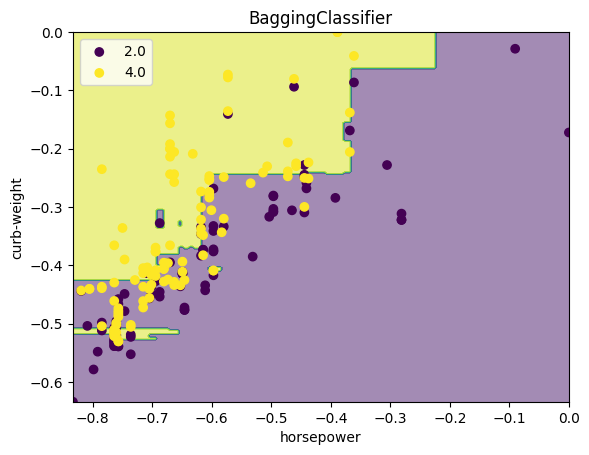

In [25]:
fig = plt.figure()
ax = fig.add_subplot()

cols = Xreduced_most.columns

xx0, xx1 = np.meshgrid(np.linspace(min(Xreduced_most[cols[0]]), max(Xreduced_most[cols[0]]), 200), np.linspace(min(Xreduced_most[cols[1]]), max(Xreduced_most[cols[1]]), 200))

least_important_col = list(set(Xreduced_more.columns) - set(cols))[0]
least_important_col_avg = Xreduced_more[least_important_col].mean()

Xmeshgrid = pd.DataFrame(np.array([xx0.ravel(), xx1.ravel(), [least_important_col_avg] * len(xx0.ravel())]).T, columns=[cols[0], cols[1], least_important_col])

response = clf5.predict(Xmeshgrid)
response = response.reshape(xx0.shape)

DecisionBoundaryDisplay(xx0=xx0, xx1=xx1, response=response, xlabel=cols[0], ylabel=cols[1]).plot(ax=ax, cmap='viridis', alpha=0.5)

for k in set(data[KLASS]):
    Xreduced_most_subset = Xreduced_most[data[KLASS] == k]
    ax.scatter(Xreduced_most_subset[cols[0]], Xreduced_most_subset[cols[1]], c=[k for _ in Xreduced_most_subset[cols[0]]], vmin=min(data[KLASS]), vmax=max(data[KLASS]), label=k)
ax.legend()
plt.title("BaggingClassifier")


Text(0.5, 1.0, 'GradientBoostingClassifier')

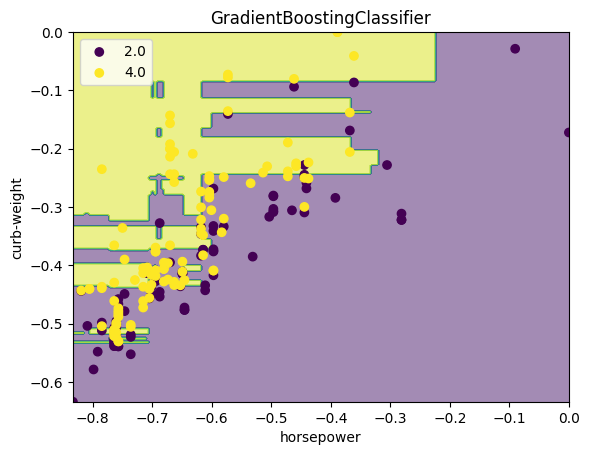

In [26]:
fig = plt.figure()
ax = fig.add_subplot()

cols = Xreduced_most.columns

xx0, xx1 = np.meshgrid(np.linspace(min(Xreduced_most[cols[0]]), max(Xreduced_most[cols[0]]), 200), np.linspace(min(Xreduced_most[cols[1]]), max(Xreduced_most[cols[1]]), 200))

least_important_col = list(set(Xreduced_more.columns) - set(cols))[0]
least_important_col_avg = Xreduced_more[least_important_col].mean()

Xmeshgrid = pd.DataFrame(np.array([xx0.ravel(), xx1.ravel(), [least_important_col_avg] * len(xx0.ravel())]).T, columns=[cols[0], cols[1], least_important_col])

response = clf6.predict(Xmeshgrid)
response = response.reshape(xx0.shape)

DecisionBoundaryDisplay(xx0=xx0, xx1=xx1, response=response, xlabel=cols[0], ylabel=cols[1]).plot(ax=ax, cmap='viridis', alpha=0.5)

for k in set(data[KLASS]):
    Xreduced_most_subset = Xreduced_most[data[KLASS] == k]
    ax.scatter(Xreduced_most_subset[cols[0]], Xreduced_most_subset[cols[1]], c=[k for _ in Xreduced_most_subset[cols[0]]], vmin=min(data[KLASS]), vmax=max(data[KLASS]), label=k)
ax.legend()
plt.title("GradientBoostingClassifier")
